In this tutorial we will train and test a linear regressor. This is something you have already done in part 3 of the course document. So, I will miss out all of the extra notes and just get to business.

In [24]:
# needed to create the data frame
import pandas as pd

# create data frame from csv file we hosted on our github
# df = pd.read_csv('https://raw.githubusercontent.com/1122131uhi/dataAnalytics/master/tutorial2lineardata.csv', index_col=0, )
df = pd.read_csv('https://raw.githubusercontent.com/20023167uhi/DataAnalytics/main/Python/Data%20Analytics%20on%20the%20Web/Assignment%201/Data/Tom_Blackwood-Linear-Weather_and_Collision_data_for_New_York_boroughs_2012-2020.csv', index_col=0, )
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2556 entries, 2013-01-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weekday_num  2556 non-null   int64  
 1   temp         2556 non-null   float64
 2   slp          2555 non-null   float64
 3   wdsp         2556 non-null   float64
 4   collisions   2556 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 119.8+ KB


In [25]:
# df = df.drop('slp', axis=1).dropna(axis=0)
df = df[df.slp.notna()]

# make sure we have our data by printing it out
# print(df[:6])
# print(df) #all
df.head(6)

,weekday_num,temp,slp,wdsp,collisions
date,,,,,
2013-01-01,2,38.0,1008.8,15.0,0.097222
2013-01-02,3,27.5,1013.4,12.4,0.498747
2013-01-03,4,21.8,1018.1,9.8,0.527430
2013-01-04,5,32.2,1015.2,11.3,0.645503
2013-01-05,6,37.3,1017.3,13.2,0.095238
2013-01-06,0,35.7,1019.7,5.9,0.118056


In [26]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

X_train.info()
X_test.info()

print(f""" 
{y_train.head()}
Length: {len(y_train)}

{y_test.head()}
Length: {len(y_test)}
""")

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 2017-10-30 to 2015-05-14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weekday_num  2044 non-null   int64  
 1   temp         2044 non-null   float64
 2   slp          2044 non-null   float64
 3   wdsp         2044 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 79.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 2019-10-27 to 2013-08-17
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weekday_num  511 non-null    int64  
 1   temp         511 non-null    float64
 2   slp          511 non-null    float64
 3   wdsp         511 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 20.0+ KB
 
date
2017-10-30    0.445346
2015-06-30    0.508846
2018-04-12    0.516092
2015-07-12    0.209363
2018-03-16    0.440729
Name: collisions, dtype: float64
Length

In [27]:
X_train.head()

,weekday_num,temp,slp,wdsp
date,,,,
2017-10-30,1,60.4,997.1,27.3
2015-06-30,2,67.1,1015.7,7.1
2018-04-12,4,42.8,1019.4,9.8
2015-07-12,0,71.5,1016.1,9.3
2018-03-16,5,36.1,1000.1,13.5


In [28]:
X_test.head()

,weekday_num,temp,slp,wdsp
date,,,,
2019-10-27,0,53.4,1022.7,14.3
2018-01-08,1,35.0,1023.6,18.3
2018-10-28,0,56.8,1007.4,13.4
2017-04-23,0,46.5,1017.3,10.5
2018-11-22,4,24.9,1022.1,19.2


In [29]:
# needed to help with speedy maths based calculations
import numpy as np

# iloc allows us to select by rows. Here, we are shuffling the data by rows determined at random.
shuffle = df.iloc[np.random.permutation(len(df))]

# we are selecting all rows of the columns outliined i.e. The 3rd (2 as indexes start from 0)
predictors = shuffle.iloc[:,0:4]
# Since it is the last column, we can also use
# predictorTest = shuffle.iloc[:,-1]

# print out the first 6 rows of predictors.
print(predictors[:6])

            weekday_num  temp     slp  wdsp
date                                       
2013-10-31            4  54.8  1021.4   6.0
2018-11-19            1  46.7  1021.0   5.0
2018-08-10            5  76.9  1010.2   6.4
2017-11-20            1  40.5  1010.3  15.4
2017-10-29            0  60.4  1012.4  12.3
2016-06-16            4  65.2  1009.1   6.6


In [30]:
# print out the shuffled data (first 5 rows)
shuffle[:5]

,weekday_num,temp,slp,wdsp,collisions
date,,,,,
2013-10-31,4,54.8,1021.4,6.0,0.590465
2018-11-19,1,46.7,1021.0,5.0,0.699092
2018-08-10,5,76.9,1010.2,6.4,0.532603
2017-11-20,1,40.5,1010.3,15.4,0.785674
2017-10-29,0,60.4,1012.4,12.3,0.394115


In [31]:
# # Select all rows for the 2nd column (i.e. 1)
# targets = shuffle.iloc[:,4]

# # print out the first 6 rows of the targets data.
# print(targets[:6])

In [32]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_TRIPS = 1.0

In [33]:
# # Split our data into a training set i.e. 80% of the length of the shuffle array
# trainsize = int(len(shuffle['collisions'])*0.8)
# # The test set size is 100% - 80% = 20% of the length of the shuffle array.
# testsize = len(shuffle['collisions']) - trainsize

# Define the number of input values (predictors)
nppredictors = 3
# Define the number of output values (targets)
noutputs = 1

In [34]:
# import tensorflow
%tensorflow_version 1.x
import tensorflow as tf

# check the version
print(tf.__version__)

# needed for high-level file management
import shutil  

# logging for tensorflow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

# removes a saved model from the last training attempt.
shutil.rmtree('/tmp/linear_regression_trained_model', ignore_errors=True)

# This is the core of our linear regressor

# You can see that we save the model, use the the Adam optimization algorithm, which is an extension 
# to stochastic gradient descent that has recently seen broader adoption for deep learning applications 
# in computer vision and natural language processing and infer real valued columns from input which interprets 
# all inputs as dense, fixed-length float values.

# See the link for more information
# https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/contrib/learn/LinearRegressor
estimator = tf.contrib.learn.SKCompat(
    tf.contrib.learn.LinearRegressor(
        model_dir='/tmp/linear_regression_trained_model', 
        optimizer=tf.train.AdamOptimizer(learning_rate=0.1), 
        enable_centered_bias=False, 
        # feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values)
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
      )
  )

# Prints a log to show model is starting to train
print("starting to train");

# Train the model. Pass in predictor values and target values.
# estimator.fit(predictors[:trainsize].values, targets[:trainsize].values.reshape(trainsize, noutputs)/SCALE_NUM_TRIPS, steps=10000)
estimator.fit(X_train, y_train/SCALE_NUM_TRIPS, steps=10000)

# Next, we can check our predictions based on our predictors.
# preds = estimator.predict(x=predictors[trainsize:].values)
preds = estimator.predict(x=X_test)

# Apply the Scale value (not really needed here) to the outputs.
predslistscale = preds['scores']*SCALE_NUM_TRIPS

# pred = format(str(predslistscale)) # useful for checking outputs and printing.

# Calculate RMSE i.e. how good the model works using the predictions and targets.
# i.e. take the difference between the actual and the forecast then square the difference, 
# find the average of all the squares and then find the square root. 
# The RMSE essentially punishes larger errors i.e. it puts a heavier weight on larger errors.
# rmse = np.sqrt(np.mean((targets[trainsize:].values - predslistscale)**2))
rmse = np.sqrt(np.mean((y_test - predslistscale)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));


# # Calculate the mean of the Number of Taxi Trips Values.
# avg = np.mean(shuffle['collisions'][:trainsize])

# # Calculate the RMSE using Number of Taxi Trips Values and the mean of all target values.
# # The fit of a proposed regression model should therefore be better than the fit of the mean model.
# # In this case, it doesn't seem to be the case but it will vary on every run.
# rmse = np.sqrt(np.mean((shuffle['collisions'][trainsize:] - avg)**2))
# print('Just using average = {0} has RMSE of {1}'.format(avg, rmse));

1.15.2
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa2b04e62e8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/linear_regression_trained_model', '_session_creation_timeout_secs': 7200}
starting to train
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Ru

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

preds2 = pd.DataFrame.from_dict(data=preds)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


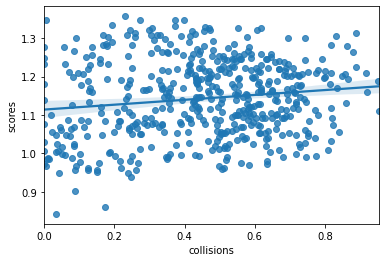

In [36]:
sns.regplot(y_test,preds2)

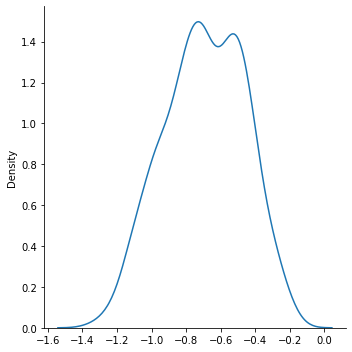

In [37]:
sns.displot(y_test.reset_index(drop=True) - preds2.scores, kind='kde');

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds2))
print('MSE:', metrics.mean_squared_error(y_test, preds2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds2)))

MAE: 0.6937660589361618
MSE: 0.5353002910861401
RMSE: 0.7316421878802097


In [39]:
if 'slp' in df.columns:
  input = pd.DataFrame.from_dict(data = {
      'day' : [1,1,1],
      'temp' : [61.8, 31.2, 77.0],
      'slp' : [1023, 1002, 985],
      'wdsp' : [5.0, 3.0, 8.0]
    })
else:
  input = pd.DataFrame.from_dict(data = {
      'day' : [1,1,1],
      'temp' : [61.8, 31.2, 77.0],
      'wdsp' : [5.0, 3.0, 8.0]
    })
					

estimator = tf.contrib.learn.SKCompat(
    tf.contrib.learn.LinearRegressor(
        model_dir='/tmp/linear_regression_trained_model', 
        enable_centered_bias=False, 
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)
    )
  )

preds_test = estimator.predict(x=input.values)
# Assume number of trips scale value is 600000 when at a maximum, based on the analysis from Tutorial 2
predslistnorm = preds_test['scores']
predslistscale = preds_test['scores']*600000
prednorm = format(str(predslistnorm))
preds_res = format(str(predslistscale))
print(prednorm)
print(preds_res)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa2b21a65c0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/linear_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/linear_regression_trained_model/model.ck

From test inputs we have used, the first element in the array here is similar to this actual data:

"165",1,62.4,5.6,0.668458757342322

We can see that the temperature is slightly higher in the test data (which means less trips, but slightly higher wind means more trips. So, the difference between (actual) 0.668 and (predicted) 0.576 (rounded to 3 significant figures) seems reasonable. 

Similarly with the second:

"389",1,26.6,3.1,0.763954173062719, which has higher number of trips due to a lower temperature and also with a slightly higher wind speed.

And with the third:

"571",1,77.2,8.4,0.724652060408235

The last prediction with the higher temperature seems to punish the values more. 

In [40]:
if 'slp' in df.columns:
  input = pd.DataFrame.from_dict(data = {
      'day' : [6,6,6],
      'temp' : [61.8, 31.2, 77.0],
      'slp' : [1023, 1002, 985],
      'wdsp' : [5.0, 3.0, 8.0]
    })
else:
  input = pd.DataFrame.from_dict(data = {
      'day' : [6,6,6],
      'temp' : [61.8, 31.2, 77.0],
      'wdsp' : [5.0, 3.0, 8.0]
    })
					
					

estimator = tf.contrib.learn.SKCompat(
    tf.contrib.learn.LinearRegressor(
        model_dir='/tmp/linear_regression_trained_model', 
        enable_centered_bias=False, 
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)
    )
  )

preds_test = estimator.predict(x=input.values)
# Assume number of trips scale value is 600000 when at a maximum, based on the analysis from Tutorial 2
predslistnorm = preds_test['scores']
predslistscale = preds_test['scores']*600000
prednorm = format(str(predslistnorm))
preds_res = format(str(predslistscale))
print(prednorm)
print(preds_res)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa2b0967ef0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/linear_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/linear_regression_trained_model/model.ck

This test uses day 6 (Friday) instead of day 1 (Sunday) which shows higher number of trips. The other values were left the same.

Things to think about for the assignment. Make a validation set i.e. 5% of the data (or maybe more). This should be used for this type of testing. My values are simply made up.

You should also remember to use different models with different data. In this case, I would maybe take each input valuable separately and make a regression model for each, then different variations i.e. any 2.

Remember, you need to write up your results in the assignment. 